In [2]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import glob
import os
import pandas as pd
import librosa as lb
from librosa import display
import scipy

In [ ]:
"""
Attribute Information:

Description of raw_data _*** file 
Each file consist of 10 columns: 
1) Time - time in ms; 
2-9) Channel - eightEMG channels of MYO Thalmic bracelet; 
10) Class â€“thelabel of gestures: 
0 - unmarked data, 
1 - hand at rest, 
2 - hand clenched in a fist, 
3 - wrist flexion, 
4 â€“ wrist extension, 
5 â€“ radial deviations, 
6 - ulnar deviations, 
7 - extended palm (the gesture was not performed by all subjects).
"""

In [3]:
def load_dataset():
    """Load the full dataset in a Pandas DataFrame
    """
    

In [4]:
def load_random_sample(path):
    """load a random sample from the dataset
    
    Arguments:
    
    path : string, path to the dataset
    
    """
    infos = next(os.walk(path + '/'))
    root = infos[0]
    folders = infos[1]
    index = np.random.randint(0,len(folders)-1)
    files = os.listdir(os.path.join(root , folders[index]))
    index2 = np.random.randint(0,len(files)-1)
    data = pd.read_csv(os.path.join(root , folders[index] , files[index2]), sep='\t')
    data.columns = ['time', 'channel_1','channel_2','channel_3',
                    'channel_4','channel_5','channel_6','channel_7', 'channel_8', 'labels']
    
    return data
    
    

In [291]:
print(list(range(0,8)))

[0, 1, 2, 3, 4, 5, 6, 7]


In [5]:
path = '/Users/Copo1/Documents/PYTHON_code/DataScience_projects/GestureRecognition/EMG_data_for_gestures-master'

In [296]:
def plot_sample(data, channels):
    """Plots the selected channels of the sample data
    
    Arguments:
    
    data : DataFrame, a single sample in the dataset
    channels : list, a list of integers between 0 and 7
    
    """
    insertL = 750
    time = data['time']
    n = len(channels)
    for i in channels:
        plt.subplot(str(n) + '1' + str(i))
        plt.plot(time, data['channel_' + str(i)], 'k', alpha = 0.75)
    for j in range(1,8):
        try:
            for k in channels:
                inds = np.hstack(np.where(data['labels'] == j)[0])
                inds = np.insert(inds,0,np.arange(inds[0]-insertL, inds[0]))
                jumps = np.hstack(np.where(np.diff(inds) > 2)[0])
                for jump in jumps:
                    refLow = inds[jump-1]
                    refHigh = inds[jump+1]
                    inds = np.insert(inds, jump-1, np.arange(inds[jump-1], inds[jump-1] + insertL))
                    inds = np.insert(inds, jump+1 + insertL, np.arange(inds[jump+1+insertL] - insertL, inds[jump+1+insertL]))
                    inds = np.insert(inds, len(inds), np.arange(inds[-1] , inds[-1] + insertL))
                plt.subplot(str(n) + '1' + str(k))
                plt.plot(time[inds], data['channel_' + str(k)][inds],'o' ,alpha = 0.15)  
        except:
            pass
            
    #plt.tight_layout()
    plt.show()
    


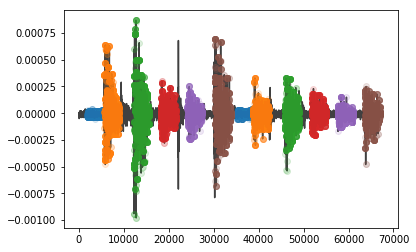

In [298]:
sample = load_random_sample(path)
plot_sample(sample,list(([1])))



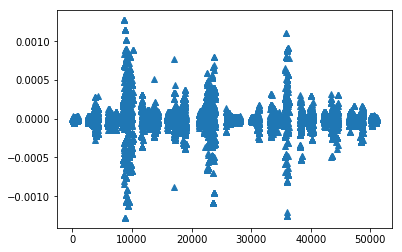

In [130]:
plt.plot(sample['channel_1'][np.where(sample['labels'] == 0)[0]],'^')
plt.show()

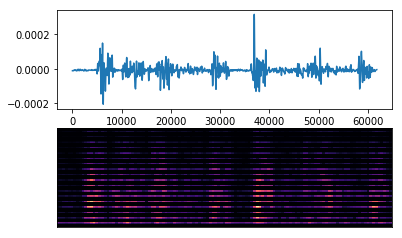

In [171]:
plt.subplot(211)
plt.plot(scipy.ndimage.gaussian_filter( sample['channel_1'],50))
plt.subplot(212)
S = lb.feature.melspectrogram(scipy.ndimage.gaussian_filter( sample['channel_1'],50),fmax=200)
display.specshow((S**(1/4)))

In [23]:
inds0 = np.where(sample['labels']==0)[0]

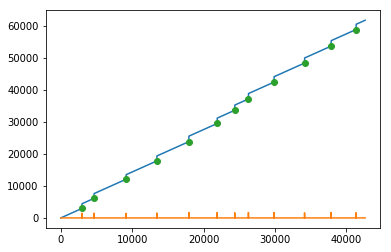

In [37]:
plt.plot(inds0)
plt.plot(np.diff(inds0))
plt.plot(np.hstack(np.where(np.diff(inds0)>2)[0]), np.hstack((inds0[np.where(np.diff(inds0)>2)[0]])),'o')
plt.show()

In [136]:
sample

,time,channel_1,channel_2,channel_3,channel_4,channel_5,channel_6,channel_7,channel_8,labels
0,1,-0.00001,-0.00002,0.00001,0.00000,0.00000,-0.00002,0.00001,-0.00001,0
1,4,-0.00001,-0.00002,0.00001,0.00000,0.00000,-0.00002,0.00001,-0.00001,0
2,6,-0.00001,-0.00002,0.00001,0.00000,0.00000,-0.00002,0.00001,-0.00001,0
3,8,-0.00001,-0.00002,0.00001,0.00000,0.00000,-0.00002,0.00001,-0.00001,0
4,9,-0.00001,0.00001,0.00000,-0.00002,-0.00001,0.00001,0.00000,-0.00001,0
5,10,-0.00001,0.00001,0.00000,-0.00002,-0.00001,0.00001,0.00000,-0.00001,0
6,11,-0.00002,0.00000,-0.00002,-0.00001,-0.00002,0.00001,0.00001,0.00000,0
7,12,-0.00002,0.00000,-0.00002,-0.00001,-0.00002,0.00001,0.00001,0.00000,0
8,13,-0.00002,0.00000,-0.00002,-0.00001,-0.00002,0.00001,0.00001,0.00000,0
9,14,-0.00002,0.00000,-0.00002,-0.00001,-0.00002,0.00001,0.00001,0.00000,0
